In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from qnetwork.tools import set_plot_style
from scipy.signal import correlate
from qnetwork.multiphoton_ww import EmittersInWaveguideMultiphotonWW,Waveguide
from typing import Optional
from aux_funs import two_qubits_analytical
set_plot_style()

# Two qubits in a cavity 

IMPORTANT!! J_carlos = J_Hong $e^{-\frac{\phi }{\tau}t} $ 

In [2]:
def exp003(gamma: float=0.1,
           phi:float = 2*np.pi,
           L: float = 2, 
           c:float = 1,
           t_max:float=40,
		   n_steps:int = 201,
           ):
	''' I am going to assume a ring. '''


	positions = [0,L]
	Delta = phi/(np.pi) 
	tau=L/c

	setup_ww=EmittersInWaveguideMultiphotonWW(positions=positions,gamma=gamma,Delta=Delta,n_excitations=list(range(2)),L=L,c=c,setup=Waveguide.Cable)
	t_ww,pop_ww=setup_ww.evolve(T=t_max,n_steps=n_steps)
	pop_ww = np.asarray(pop_ww)
	pop_ww= [pop_ww[:,0],pop_ww[:,1]]

	t_dde,pop_dde = two_qubits_analytical(gamma=gamma,phi=phi,tau=tau,t_max=t_max)

	fig,ax = plt.subplots(figsize=(8,6))
	ax.plot(t_dde,pop_dde[0],label='DDE qubit 1')
	ax.plot(t_dde,pop_dde[1],label='DDE qubit 2')
	ax.plot(t_ww,pop_ww[0],'v',markevery=20,label='WW qubit 1')
	ax.plot(t_ww,pop_ww[1],'v',markevery=20,label='WW qubit 2')
	ax.set_xlabel(r"$\gamma t$")
	ax.set_title(r"$ \langle \sigma^{+} \sigma^{-}\rangle $")
	ax.legend()
	 
	fig.tight_layout()
	plt.show()
    

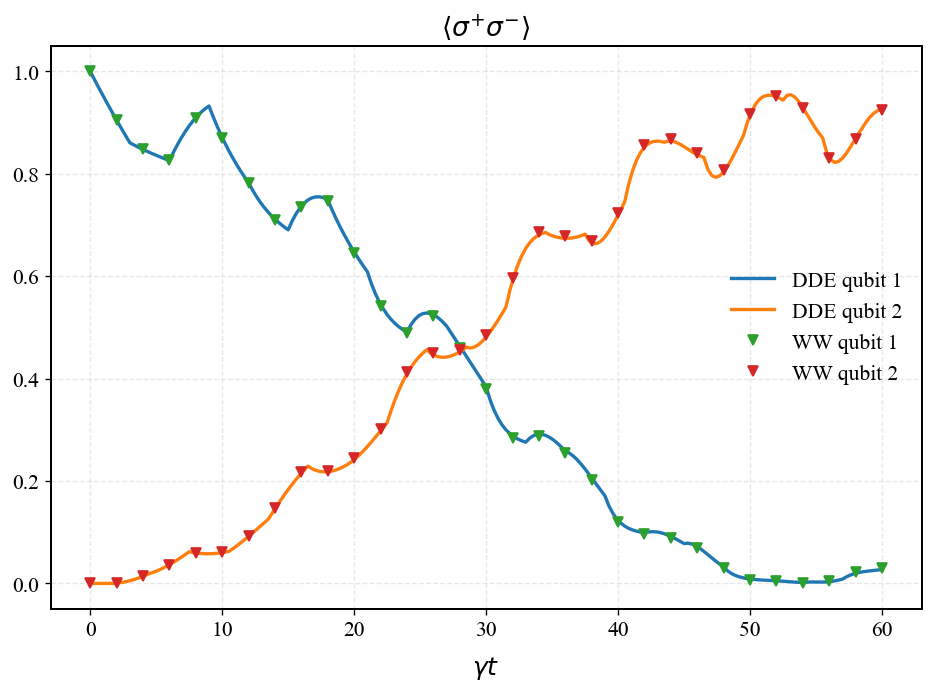

In [5]:
exp003(phi=100.3*np.pi,n_steps=601,gamma=0.05,L=1.2,c=0.8,t_max=60)

# Characterization of Rabi-Like behavior 

The points to show in this section are 
1. The DDE contain Rabi physics 
2. The Rabi oscillations are 'protected' by symmetry in high energetic modes of the coupling 

In [ ]:
def run_ww_simulation(t_max: Optional[float] = None , gamma :float = 0.1, Delta: float = 10.0 , L:float = 1, c: float = 1, n_steps: int = 201,n_modes=20):
	tau=2*L/c
	if t_max is None:
		t_max = 25*tau 
	setup=EmittersInWaveguideMultiphotonWW(gamma=gamma,Delta=Delta,L=L,c=c,positions=[0.0], n_modes=n_modes, n_excitations=list(range(2)))
	t,e = setup.evolve(t_max,n_steps=n_steps,initial_state="1")
	return t,e

def run_dde_simulation(t: list|np.ndarray , gamma :float = 0.1, tau: float=2,phi: float = 10.0,):
	return np.abs(DDE_analytical(gamma=gamma,phi=phi,tau=tau,t=t))**2


In [ ]:
from scipy.signal import find_peaks

def exp004(t_max: Optional[float] = None , gamma :float = 0.1, Delta: float = 10, L:float = 1, c: float = 1, n_steps: int = 201,plot_bool:bool =True): 

	t = np.linspace(0,t_max,n_steps)
	phi = 2*np.pi*Delta
	tau = 2*L/c
	e_dde = run_dde_simulation(t=t,gamma=gamma,tau=tau,phi=phi)
	e_rabi = np.cos(np.sqrt(gamma/tau)*t)**2
	# if I am not mistaken, this is the correlation
	dt = t[1]-t[0] 

	corr = correlate(e_dde-np.mean(e_dde),e_dde-np.mean(e_dde))
	corr_positive = corr[t.shape[0]-1:]
	corr_positive=corr_positive/corr_positive[0]
	peaks_corr,_=find_peaks(corr_positive)
	
	correlation_times=corr_positive[peaks_corr]

	corr_rabi = correlate(e_rabi-np.mean(e_rabi),e_rabi-np.mean(e_rabi))
	corr_rabi_positive = corr_rabi[t.shape[0]-1:]
	corr_rabi_positive = corr_rabi_positive/corr_rabi_positive[0]
	peaks_corr_rabi,_=find_peaks(corr_rabi_positive)
	if plot_bool:
		plt.plot(t/tau,corr_positive,label='DDE')
		plt.plot((t/tau)[peaks_corr],correlation_times,'o')
		
		plt.plot(t/tau,corr_rabi_positive,'r--',label='Rabi')
		plt.plot((t/tau)[peaks_corr_rabi],corr_rabi_positive[peaks_corr_rabi],'o')
		
		plt.axvline(np.pi/np.sqrt(gamma*tau),color='k',linestyle='-.',alpha=0.5,label=r'$\frac{\pi}{\sqrt{\gamma \tau}}$')
		plt.grid()
		plt.legend()
		plt.xlabel(r"$t/\tau$")
		plt.show()
	return t[peaks_corr][0]

#def exp004(t_max: Optional[float] = None , gamma :float = 0.1, Delta: float = 10, L:float = 1, c: float = 1, n_steps: int = 201,n_modes=20,plot_bool:bool =True): 

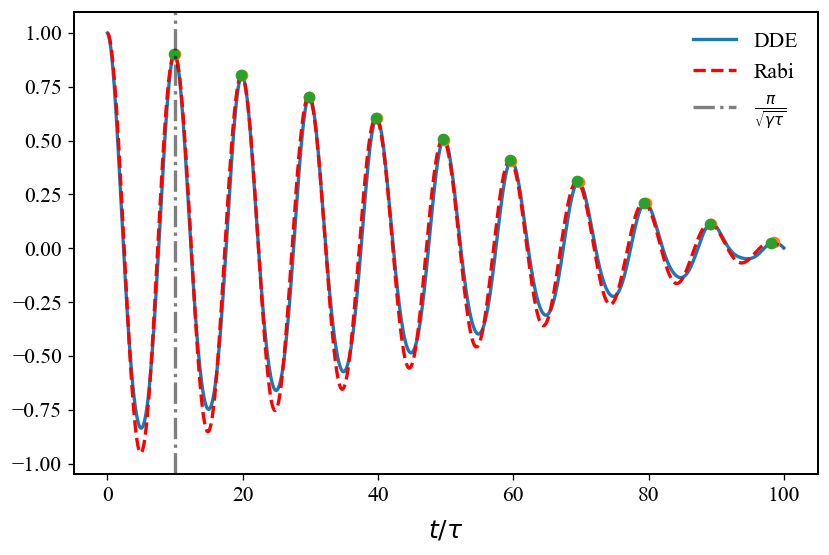

np.float64(19.84)

In [ ]:
exp004(gamma=0.05,t_max=200,n_steps=2501)